# Importing tha dataset and required library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('datafile.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


In [6]:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [7]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


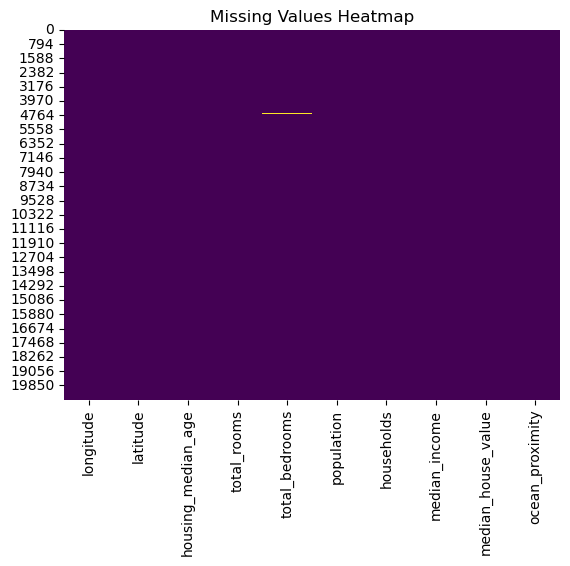

In [8]:
# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

#  Exploratory Data Analysis (EDA)

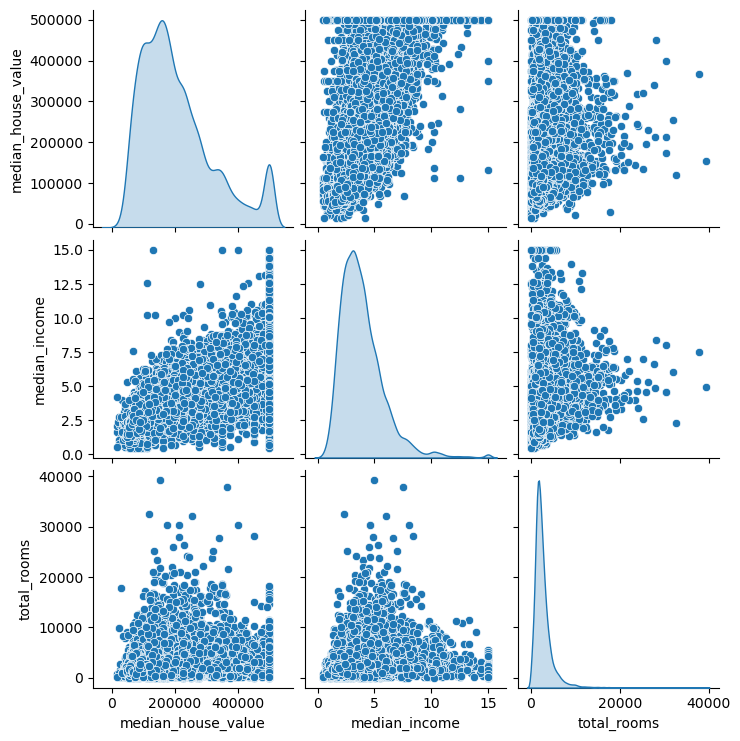

In [10]:
# Pairplot for numerical variables
sns.pairplot(df[['median_house_value', 'median_income', 'total_rooms', 'ocean_proximity']], diag_kind='kde')
plt.show()

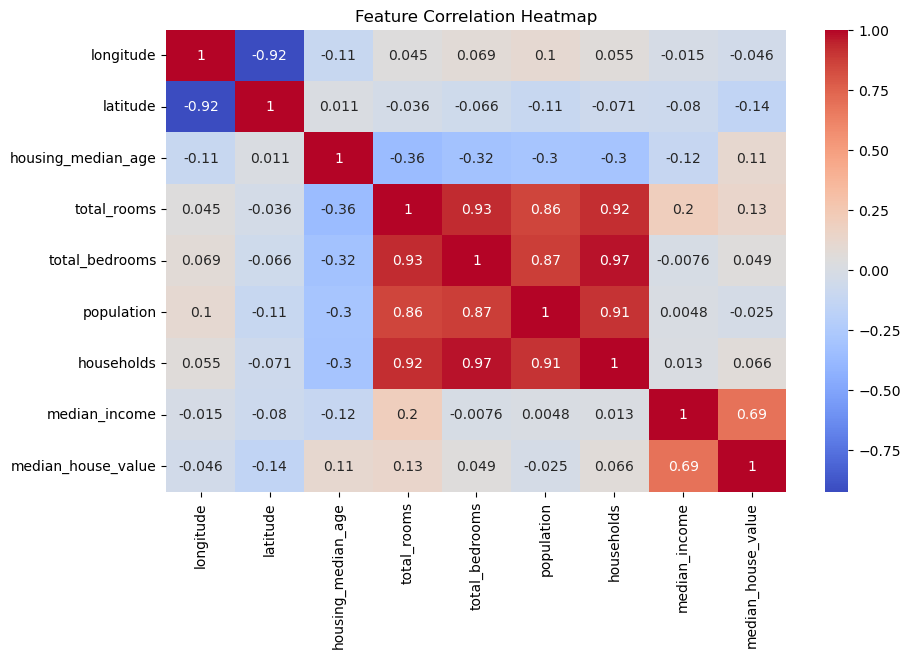

In [11]:
# Correlation heatmap
df_numeric = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

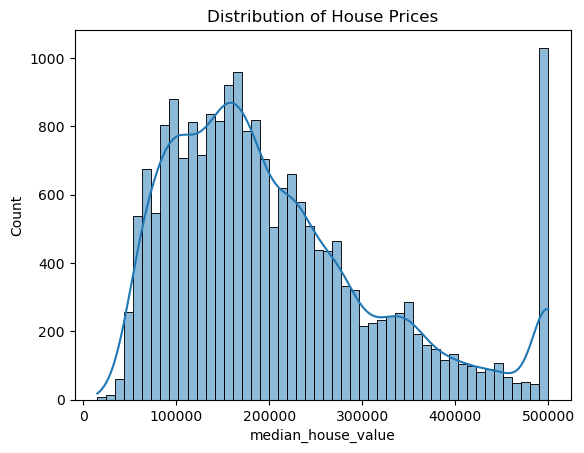

In [12]:
# Distribution of the target variable
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.show()

#  Data Preprocessing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Correct handling of categorical columns
categorical_features = ['ocean_proximity']
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('median_house_value')

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Splitting data
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print("Data preprocessing completed successfully.")

Data preprocessing completed successfully.


# Simple Linear Regression 

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting one feature (e.g., 'median_income') for simple linear regression
X_simple = df[['median_income']]
y_simple= df['median_house_value']

# Splitting the data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Training the model
simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)

# Predictions
y_pred_s = simple_model.predict(X_test_s)

# Model evaluation
mse_simple = mean_squared_error(y_test_s, y_pred_s)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test_s, y_pred_s)

print("Simple Linear Regression Results:")
print(f"RMSE: {rmse_simple:.2f}")
print(f"R² Score: {r2_simple:.2f}")


Simple Linear Regression Results:
RMSE: 84209.01
R² Score: 0.46


# Multiple Linear Regression

In [22]:
# Use already preprocessed X_train and X_test
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

y_pred = multi_model.predict(X_test)
rmse_m = np.sqrt(mean_squared_error(y_test, y_pred))
r2_m = r2_score(y_test, y_pred)

print("Multiple Linear Regression:")
print(f"RMSE: {rmse_m:.2f}")
print(f"R² Score: {r2_m:.2f}")

Multiple Linear Regression:
RMSE: 70060.52
R² Score: 0.63


# XGBoost


In [31]:
from xgboost import XGBRegressor

# Train XGBoost regressor on the preprocessed data
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regression:")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.2f}")

XGBoost Regression:
RMSE: 47612.81
R² Score: 0.83


In [33]:
print("Model Performance Comparison:")
print(f"Simple Linear Regression - RMSE: {rmse_simple:.2f}, R²: {r2_simple:.2f}")
print(f"Multiple Linear Regression - RMSE: {rmse_m:.2f}, R²: {r2_m:.2f}")
print(f"XGBoost Regression - RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.2f}")

Model Performance Comparison:
Simple Linear Regression - RMSE: 84209.01, R²: 0.46
Multiple Linear Regression - RMSE: 70060.52, R²: 0.63
XGBoost Regression - RMSE: 47612.81, R²: 0.83


# Visualization: Actual vs Predicted (Linear Regression)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual Prices')
plt.scatter(X_test_s, y_pred_s, color='red', label='Predicted Prices')
plt.title('Simple Linear Regression: Predicted vs Actual')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

# Visualization: Actual vs Predicted (Multiple Regression)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Value (Multiple Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.tight_layout()
plt.show()

# Visualization: Actual vs Predicted (XGBoost)

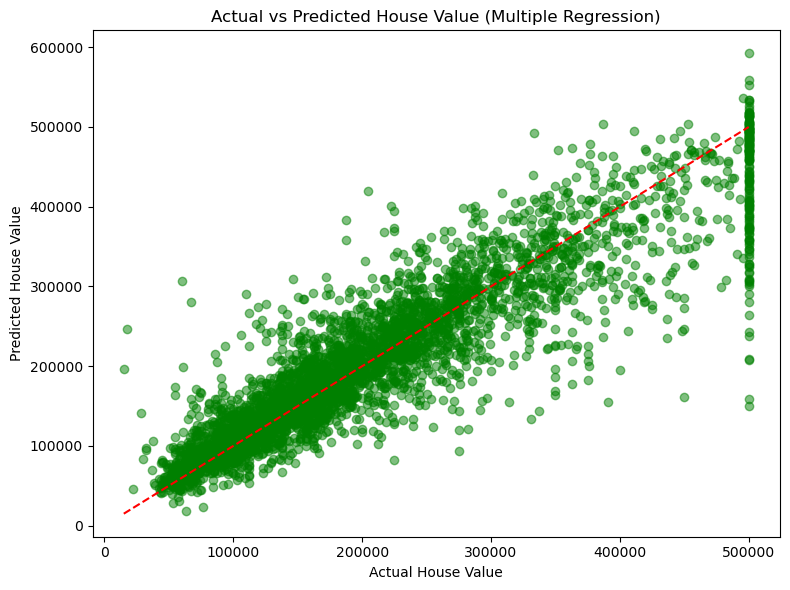

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='green')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title("Actual vs Predicted House Value (Multiple Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

#  Model Comparison Summary Table

In [46]:
results = pd.DataFrame({
    "Model": ["Simple Linear Regression", "Multiple Linear Regression", "XGBoost Regression"],
    "MSE": [mse_simple, rmse_simple, rmse_xgb],
    "RMSE": [rmse_simple, rmse_m, rmse_xgb],
    "R² Score": [r2_simple, r2_m, r2_xgb]
})

print("\nModel Performance Comparison:")
print(results)


Model Performance Comparison:
                        Model           MSE          RMSE  R² Score
0    Simple Linear Regression  7.091158e+09  84209.012414  0.458859
1  Multiple Linear Regression  8.420901e+04  70060.521845  0.625424
2          XGBoost Regression  4.761281e+04  47612.814796  0.827002


In [27]:
# Example: Predicting price for new data
sample_data = pd.DataFrame([{
    'longitude': -122.23,
    'latitude': 37.88,
    'housing_median_age': 41.0,
    'total_rooms': 880.0,
    'total_bedrooms': 129.0,
    'population': 322.0,
    'households': 126.0,
    'median_income': 8.3252,
    'ocean_proximity': 'NEAR BAY'
}])

# Apply same preprocessing
sample_processed = preprocessor.transform(sample_data)

# Predict
predicted_price = multi_model.predict(sample_processed)
print(f"Predicted Median House Value: ${predicted_price[0]:.2f}")

Predicted Median House Value: $410584.36
